# Problem Statement

# Import Libraries

In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor

#-------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#------------------------------------- 
from imblearn.over_sampling import SMOTE,RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

# Define Functions

In [42]:
# def outlier_detect(df, col):
#     q1_col = Q1[col]
#     iqr_col = IQR[col]
#     q3_col = Q3[col]
#     return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# # ----------------------------------------------
# def outlier_detect_normal(df, col):
#     m = df[col].mean()
#     s = df[col].std()
#     return df[((df[col]-m)/s).abs()>3]

# # ----------------------------------------------
# def lower_outlier(df, col):
#     q1_col = Q1[col]
#     iqr_col = IQR[col]
#     q3_col = Q3[col]
#     lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
#     return lower

# # ----------------------------------------------
# def upper_outlier(df, col):
#     q1_col = Q1[col]
#     iqr_col = IQR[col]
#     q3_col = Q3[col]
#     upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
#     return upper

# # ----------------------------------------------
# def preprocess(df, col):
#     print("************************* {} *************************\n".format(col))
#     print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
#     plt.figure(figsize=(8,5))
#     df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
#     plt.show()
    

# ----------------------------------------------
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
def RandomSearch_Tune(model, Data, X, y, params):
    
    clf = RandomizedSearchCV(model, params, scoring ='accuracy', cv = CV, n_jobs=-1)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    
    return (clf.best_score_)

# ----------------------------------------------
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)


# Data Understanding

In [43]:
df = pd.read_csv("Telecom_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.shape

(7043, 21)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
columns = df.columns
numeric=[]
categorical=[]
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        numeric.append(columns[i])
        
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        categorical.append(columns[i])
print('numeric columns are : \n',numeric)
print('categorical columns are :\n ',categorical)


numeric columns are : 
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical columns are :
  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [47]:
df.drop(['customerID'], axis=1, inplace=True)

In [48]:
df.TotalCharges.value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6534, dtype: int64

In [49]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan, regex=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


In [58]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

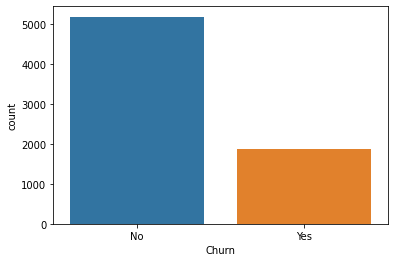

In [59]:
sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

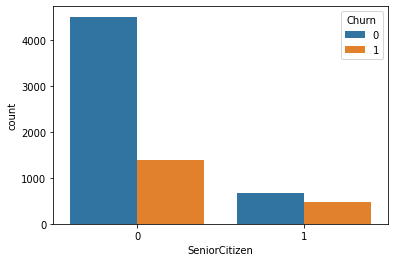

In [125]:
sns.countplot(x = "SeniorCitizen", data = df , hue='Churn')

<AxesSubplot: xlabel='gender', ylabel='count'>

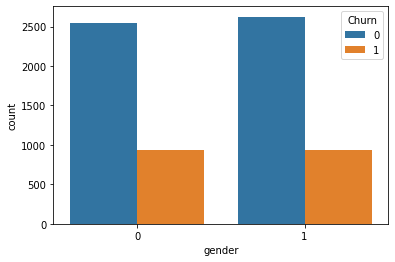

In [124]:
sns.countplot(x = "gender", data = df , hue='Churn')

In [64]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
num=['tenure','MonthlyCharges', 'TotalCharges']

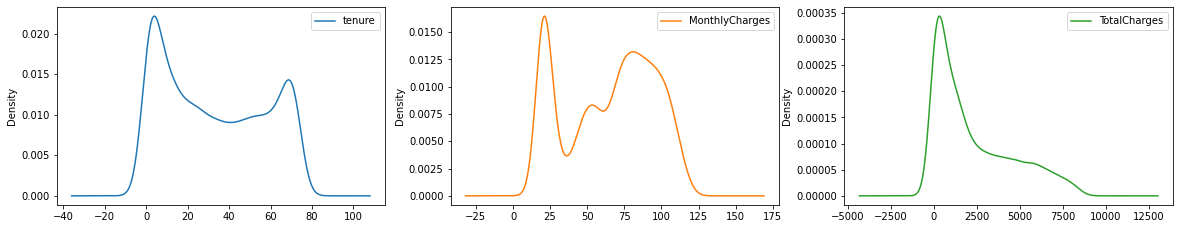

In [66]:
df[num].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (20,8))
plt.show()

# Preprocessing

In [67]:
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median())

In [68]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Dealing with categorical features

In [88]:
df['Churn'].value_counts().to_dict()

{'No': 5174, 'Yes': 1869}

In [89]:
df['gender']=df['gender'].replace({'Male':1, 'Female':0})
df['Partner']=df['Partner'].replace({'No': 0, 'Yes': 1})
df['Dependents']=df['Dependents'].replace({'No': 0, 'Yes': 1})
df['PhoneService']=df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['MultipleLines']=df['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 2})
df['InternetService']=df['InternetService'].replace({'Fiber optic': 2, 'DSL': 1, 'No': 0})
df['OnlineSecurity']=df['OnlineSecurity'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['OnlineBackup']=df['OnlineBackup'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['DeviceProtection']=df['DeviceProtection'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['TechSupport']=df['TechSupport'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['StreamingTV']=df['StreamingTV'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['StreamingMovies']=df['StreamingMovies'].replace({'No': 0, 'Yes': 2, 'No internet service': 1})
df['PaperlessBilling']=df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})
df['Churn']=df['Churn'].replace({'No': 0, 'Yes': 1})



In [90]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,1,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,2,1,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,2,0,2,2,2,2,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,0,2,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,2,1,2,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [91]:
df_dummy = pd.get_dummies(df, prefix=['Contract', 'PaymentMethod'],columns=['Contract', 'PaymentMethod'], drop_first=True)
df_dummy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,2,1,0,2,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,2,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,2,2,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,2,1,2,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0


In [92]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   InternetService                        7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [95]:
df_dummy.loc[df.duplicated()].shape

(22, 23)

In [96]:
df_dummy = df_dummy.drop_duplicates()
df_dummy.shape

(7021, 23)

<AxesSubplot: >

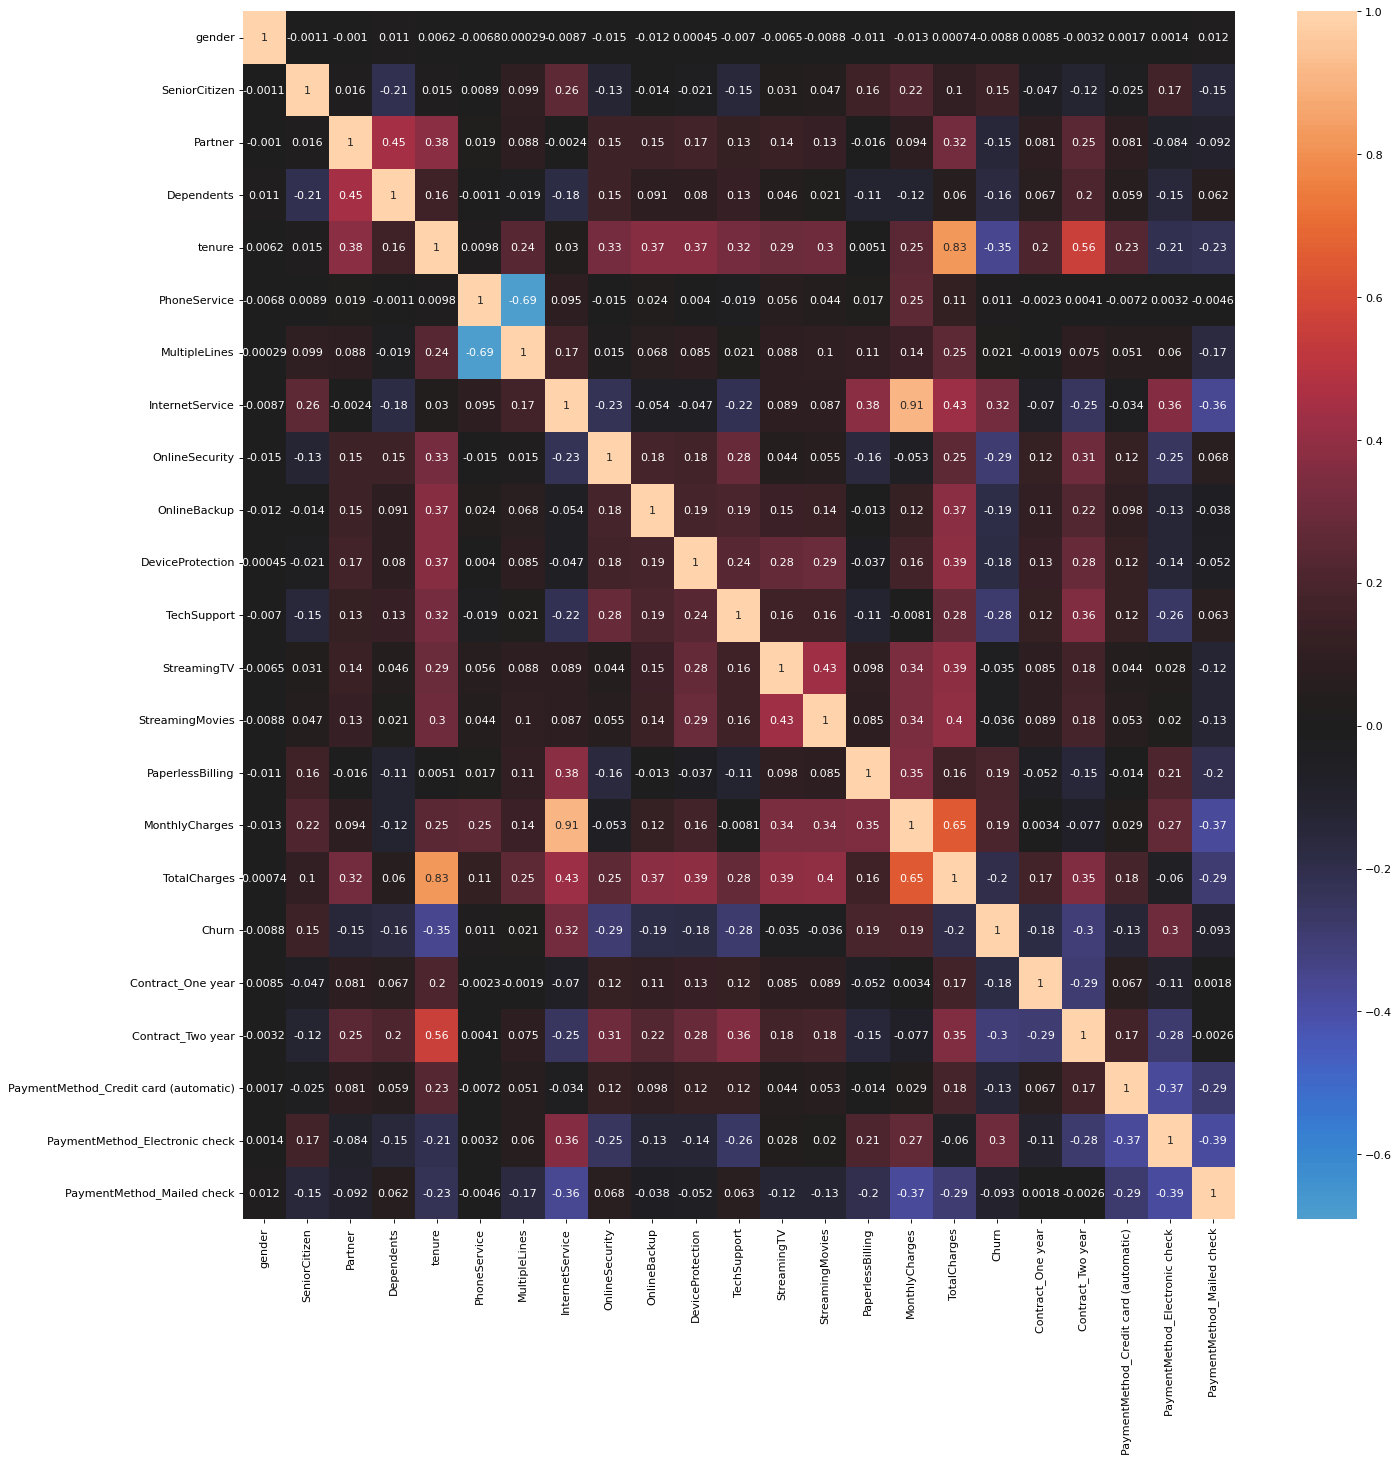

In [98]:
fig, ax = plt.subplots(figsize=(20,20),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_dummy.corr(), annot = True, center = 0,annot_kws={"fontsize":10})

# Balancing Data

In [100]:
x = df_dummy.drop("Churn", axis = 1)
y = df_dummy['Churn']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

0    4131
1    1485
Name: Churn, dtype: int64


In [102]:
scale = MinMaxScaler()
col = x_train.columns

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

## RandomOverSampler

In [103]:
x_train_randOverSample = x_train.copy()
y_train_randOverSample = y_train.copy()

In [104]:
print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))

Before OverSampling- counts of label '1': 1857
Before OverSampling- counts of label '0': 5164 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (8262, 22)
After OverSampling with RandomOverSampler- y_train: (8262,) 

After OverSampling with RandomOverSampler- counts of label '1': 4131
After OverSampling with RandomOverSampler- counts of label '0': 4131


In [105]:
x_train_new_randOverSample = x_train_randOverSample[['tenure',
                                                     'InternetService',
                                                     'OnlineBackup',
                                                     'TechSupport',
                                                     'MonthlyCharges',
                                                     'Contract_One year',
                                                     'Contract_Two year',
                                                     'PaymentMethod_Electronic check']]

x_test_new_randOverSample = x_test[['tenure',
                                     'InternetService',
                                     'OnlineBackup',
                                     'TechSupport',
                                     'MonthlyCharges',
                                     'Contract_One year',
                                     'Contract_Two year',
                                     'PaymentMethod_Electronic check']]

In [106]:
checkVIF(x_train_new_randOverSample).reset_index(drop=True)

,Features,VIF
0,MonthlyCharges,29.66
1,InternetService,26.34
2,tenure,5.40
3,Contract_Two year,2.63
4,OnlineBackup,2.09
5,PaymentMethod_Electronic check,2.03
6,TechSupport,1.99
7,Contract_One year,1.77


In [107]:
DT = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=0)
cross_val_DT = cross_val_score(DT, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,min_samples_split=6, n_estimators=25, random_state=0)
cross_val_RF = cross_val_score(RF, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
LR = LogisticRegression(C=10, random_state=0, solver='newton-cg')
cross_val_LR = cross_val_score(LR, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, scoring = 'accuracy') 
cross_val_LR_f1 = cross_val_score(LR, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, 
                               scoring = 'f1') 

# --------------------------------------------------------------------------
estimators = [('DT', DT),
              ('RF', RF),
              ('LR', LR)
             ]

In [111]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean())]

In [113]:
predict = pd.DataFrame(data = compare_models, 
                       columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)'])
predict

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.816991,0.822680
1,Random Forest,0.846402,0.855658
2,Logistic Regression,0.747883,0.758440


## SMOTE 

In [114]:
x_train_smote = x_train.copy()
y_train_smote = y_train.copy()

In [115]:
print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())

print('After OverSampling with SMOTE- x_train: {}'.format(x_train_smote.shape))
print('After OverSampling with SMOTE- y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SMOTE- counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling with SMOTE- counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling- counts of label '1': 1857
Before OverSampling- counts of label '0': 5164 

*******************************************************************
After OverSampling with SMOTE- x_train: (8262, 22)
After OverSampling with SMOTE- y_train: (8262,) 

After OverSampling with SMOTE- counts of label '1': 4131
After OverSampling with SMOTE- counts of label '0': 4131


In [116]:
x_train_new_smote = x_train_smote[['SeniorCitizen',
                                     'tenure',
                                     'InternetService',
                                     'OnlineSecurity',
                                     'OnlineBackup',
                                     'TechSupport',
                                     'Contract_One year',
                                     'Contract_Two year',
                                     'PaymentMethod_Electronic check']]

x_test_new_smote = x_test[['SeniorCitizen',
                             'tenure',
                             'InternetService',
                             'OnlineSecurity',
                             'OnlineBackup',
                             'TechSupport',
                             'Contract_One year',
                             'Contract_Two year',
                             'PaymentMethod_Electronic check']]

In [117]:
checkVIF(x_train_new_smote).reset_index(drop=True)

,Features,VIF
0,tenure,5.58
1,InternetService,3.71
2,Contract_Two year,2.78
3,OnlineBackup,2.15
4,PaymentMethod_Electronic check,2.14
5,TechSupport,2.06
6,OnlineSecurity,1.95
7,Contract_One year,1.83
8,SeniorCitizen,1.37


In [118]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=0)
cross_val_DT = cross_val_score(DT, x_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train_new_smote, y_train_smote , cv = CV, scoring = 'f1' ) 

# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=3,min_samples_split=5, 
                            n_estimators=200, random_state=0)
cross_val_RF = cross_val_score(RF, x_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, x_train_new_smote, y_train_smote , cv = CV, scoring = 'f1') 

# --------------------------------------------------------------------------
LR = LogisticRegression(C=4, multi_class='ovr', penalty='l1', random_state=0, solver='saga')
cross_val_LR = cross_val_score(LR, x_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_LR_f1 = cross_val_score(LR, x_train_new_smote, y_train_smote , cv = CV, scoring = 'f1') 



In [119]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean())
                  ]


In [121]:
predict = pd.DataFrame(data = compare_models, 
                       columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)'])
predict

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.785159,0.795563
1,Random Forest,0.819654,0.823119
2,Logistic Regression,0.763617,0.772943
